In [2]:
using Plots
using DataFrames
gr()

Plots.GRBackend()

# Exercise session 1: Day-ahead electricity markets - Basics

## Problem 1: General description of a day-ahead market and the example of the Nord Pool

**1.1 What is the common name of the day-ahead market in Nord Pool?**

Elspot

**1.2 How many participants are they in the day-ahead market? And how many power producers in the whole area covered by the Nord Pool? Can you explain why all power producers do not trade through the Nord Pool, and how they then proceed? [Link](https://www.nordpoolgroup.com/the-power-market/The-market-members/)**

360 members and 370 power producers.
They don't trade through Nord Pool because they do bilateral contracts or through brokers.

**1.3 What is the overall volume (on average) of energy generated over the Nordic and Baltic countries?**

**1.4 What was the average systems price in the Nordic area in 2018?**

43.99 €/MWh

**1.5 What was the overall amount of energy exchanged through the Nord Pool (Nordic and Baltic) day-ahead market in 2018? What about the UK?**

396 TWh in the Nordic and Baltic day-ahead market and 120 TWh in the UK.

**1.6 What are the various types of power production technologies in the Nordic and Baltic countries? Rank them in terms of marginal production costs (in increasing order). What are the most important ones?**
  1. Solar
  2. Wind
  3. Hydro
  4. Nuclear
  5. Biomass/CHP
  6. Thermal (CCGT, Coal, and Oil)

**1.7 Who are the various participants in the day-ahead market? What is their role?**
* Generator
* Trader/Broker
* Large Consumers
* Retailers

**1.8 Who owns Nord Pool? (see webpage \About us")**

Nord Pool is owned by Euronext (66%) and the Nordic Transmission System Operators and Litgrid (Lithuanian TSO) retain 34% ownership through a joint holding company.

**1.9 What is the market time unit (i.e, a few minutes, a whole day, or...?), and what are the bidding areas?**

For the DAM is hourly, RTM is 15-minutes, 30-minutes, and hourly bids. There are 15 bidding areas, NO1-5, DK1-2, SE1-4, FI, EE, LV, and LT.

**1.10 What are the assumptions for the definition of bidding areas?**

The system price is an unconstrained market clearing reference price for the Nordic region. It is calculated without any congestion restrictions by setting capacities to infinity.

## Problem 2: Consideration and ordering of supply offers in a pool

**2.1 What do we call the "supply curve" in the day-ahead market?**

Aggregated supply curve or merit-order curve

**2.2 How is it defined based on a set of offers?**

Ordered by increasing marginal cost or bids.

**2.3 Draw (paper, or plot based on Matlab/R/Excel/etc.) the supply curve for this market time unit.**

|Supplier name| Supplier id.| Quantity [MWh]| Price [EUR/MWh]|
|---|---|---|---|
|FlexiGas| G1| 15| 75|
|Nuke22 |G2| 100| 15|
|ShinyPower |G3| 32| 0
|RoskildeCHP |G4| 25| 42|
|BlueWater |G5| 70| 10|

In [79]:
supplier=["FlexiGas","Nuke22","ShinyPower","RoskildeCHP","BlueWater","Zero"]
id=["G₁","G₂","G₃","G₄","G₅", "Z"]
quantity=[15,100,32,25,70,0]
price=[75,15,0,42,10,0]

bidsSupplier = DataFrame(Supplier=supplier,ID=id,Quantity=quantity,Price=price)
sort!(bidsSupplier,[:Price, :Quantity])

aggregatedQ=zeros(Int64, 6)

i=1
for p in bidsSupplier.Quantity
    if i==1
    else
    aggregatedQ[i]=aggregatedQ[i-1]+p
    end
    i=i+1
end

insertcols!(bidsSupplier,4,AggregatedQ=aggregatedQ)

,Supplier,ID,Quantity,AggregatedQ,Price
,String,String,Int64,Int64,Int64
1,Zero,Z,0,0,0
2,ShinyPower,G₃,32,32,0
3,BlueWater,G₅,70,102,10
4,Nuke22,G₂,100,202,15
5,RoskildeCHP,G₄,25,227,42
6,FlexiGas,G₁,15,242,75


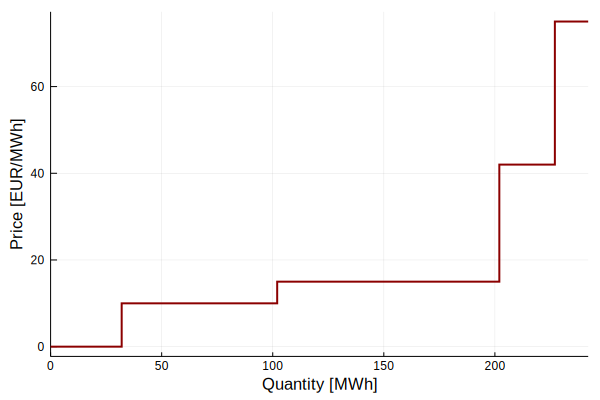

In [80]:
plot(bidsSupplier.AggregatedQ,bidsSupplier.Price,w=2,t=:steppre, xlim=(0,sum(bidsSupplier.Quantity)), xlab="Quantity [MWh]", ylab="Price [EUR/MWh]", color="darkred", legend=false)

**2.4 What is the total amount of energy offered through the market?**

In [46]:
maximum(aggregatedQ)

242

**2.5 By the way... Can they be other types of offers than single-hourly offers?**

Yes, block offers, exclusive group, and flexi offers.

## Problem 3:

**3.1 What do we call the "demand curve" in the day-ahead market?**

Aggregated demand curve

**3.2 How is it defined based on a set of offers?**

It's sorted from the highest priced offer to the lowest.

**3.3 Draw (paper, or plot based on Matlab/R/Excel/etc.) the demand curve for this market time unit.**

|Demand name| Demand id.| Quantity [MWh]| Price [EUR/MWh]|
|---|---|---|---|
|WeLovePower| D1| 35| 65|
|CleanCharge| D2| 23| 78|
|JyskeEl| D3| 12| 10|
|ElRetail| D4| 38| 46|
|QualiWatt| D5| 43| 63|
|IntelliWatt| D6| 16| 32|
|El-Forbundet| D7| 57| 50|


In [82]:
consumer=["WeLovePower","CleanCharge","JyskeEl","ElRetail","QualiWatt","IntelliWatt", "El-Forbundet","Zero"]
id=["D₁","D₂","D₃","D₄","D₅","D₆","D₇","Z"]
quantity=[35,23,12,38,43,16,57,0]
price=[65,78,10,46,63,32,50,78.01]

bidsConsumer = DataFrame(Consumer=consumer,ID=id,Quantity=quantity,Price=price)
sort!(bidsConsumer,[:Price, :Quantity],rev=true)

aggregatedQ=zeros(size(consumer))

i=1
for p in bidsConsumer.Quantity
    if i==1
    else
    aggregatedQ[i]=aggregatedQ[i-1]+p
    end
    i=i+1
end

insertcols!(bidsConsumer,4,AggregatedQ=aggregatedQ)

,Consumer,ID,Quantity,AggregatedQ,Price
,String,String,Int64,Float64,Float64
1,Zero,Z,0,0.0,78.01
2,CleanCharge,D₂,23,23.0,78.0
3,WeLovePower,D₁,35,58.0,65.0
4,QualiWatt,D₅,43,101.0,63.0
5,El-Forbundet,D₇,57,158.0,50.0
6,ElRetail,D₄,38,196.0,46.0
7,IntelliWatt,D₆,16,212.0,32.0
8,JyskeEl,D₃,12,224.0,10.0


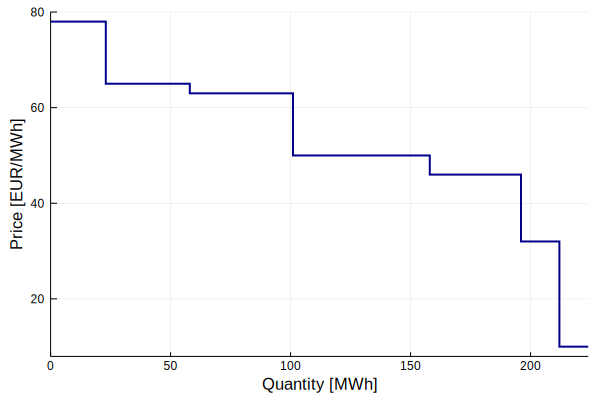

In [88]:
plot(bidsConsumer.AggregatedQ,bidsConsumer.Price,w=2,t=:steppre, xlim=(0,sum(bidsConsumer.Quantity)), xlab="Quantity [MWh]", ylab="Price [EUR/MWh]", color="darkblue", legend=false)

**3.4 What is the total amount of energy asked for through the market? Compare it to the total amount of energy supply offers. Is there a problem there?**

In [84]:
maximum(aggregatedQ)

224.0

There's less total energy demand than offered energy supply, that just means that some producers won't be dispatched in the market clearing mechanism.

## Problem 4: Equilibrium and market-clearing

**4.1 Have your supply and demand curve on the same drawing/plot.**

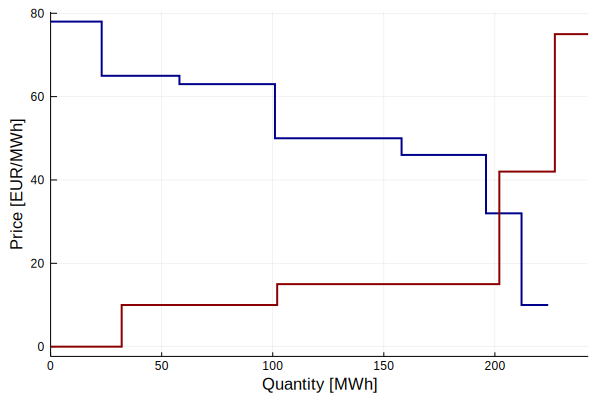

In [89]:
plot!(bidsSupplier.AggregatedQ,bidsSupplier.Price, xlim=(0,sum(bidsSupplier.Quantity)),w=2, t=:steppre, color="darkred", legend=false)

**4.2 Identify the "equilibrium point". What does it mean in the present case?**

It should be the point where both curves match. It's the price that maximizes the social welfare of the system.

**4.3 What is the equilibrium price and quantity?**

242

**4.4 Who will be effectively supplying power (and how much)? And, who will be effectively consuming (and how much)? Why does that make natural sense?**

**4.5 Calculate social welfare.**